In [51]:
import torch
import os,glob
from moviepy.editor import *
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt   
import librosa as rs
import json
import cv2

## PATH

In [61]:
dir_LRS = "/home/data/kbh/DSS/LRS_test/v0/"
dir_RIR = "/home/data/kbh/RIR/LRS3/test_R907/"
dir_vid = "/home/data/kbh/lip/LRS3/test/"
id_target = "0"


path_label = "{}/{}.json".format(dir_LRS,id_target)
path_noisy = "{}/{}.wav".format(dir_LRS,id_target)

f = open(path_label,'r')
label = json.load(f)
print(label)

person = label["id_person"][0]
spk = label["id_spk"][0]
path_clean = "{}/{}_{}/{}_{}.wav".format(dir_RIR,person,spk,person,spk)


path_vid = "{}/{}/{}.pt".format(dir_vid,person,spk)

{'id_person': ['fTSXvLzNd0o', '87AEeLpodnE', 'YzGjO5aHShQ'], 'id_spk': ['00002', '00005', '00017'], 'start_clean_audio': [0, 0, 0], 'length_clean_audio': [34240, 35520, 40000], 'start_noisy_audio': [7630, 7604, 7663], 'length_noisy_audio': [34240, 35520, 40000], 'start_clean_video': [0, 0, 0], 'length_clean_video': [53, 55, 62], 'start_noisy_video': [11, 11, 11], 'length_noisy_video': [53, 55, 62], 'SIR': [0, 9, 3], 'n_sample': 48000, 'n_frame': 75, 'scale_dB': -25.14294465759178, 'filename': ['fTSXvLzNd0o_00002_R907_130_1.5m.wav', '87AEeLpodnE_00005_R907_240_1.5m.wav', 'YzGjO5aHShQ_00017_R907_180_1.5m.wav']}


## Audio

In [73]:
path_clean

'/home/data/kbh/RIR/LRS3/test_R907//fTSXvLzNd0o_00002/fTSXvLzNd0o_00002.wav'

## noisy

## clean

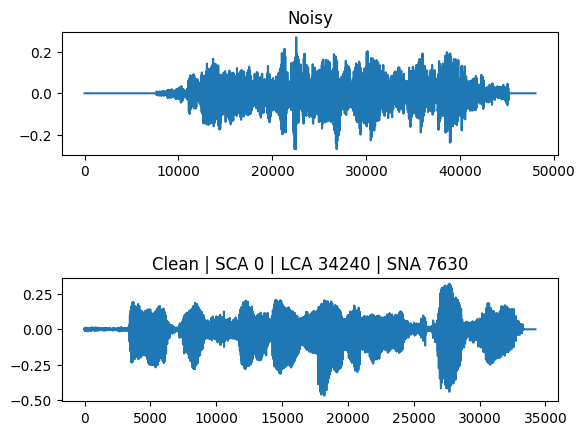

In [63]:
noisy, _ = rs.load(path_noisy,sr=16000)
plt.figure()
ax = plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)

ax.set_title("Noisy")

plt.plot(noisy)

clean, _ = rs.load(path_clean,sr=16000)
ax = plt.subplot(2,1,2)
ax.set_title("Clean | SCA {} | LCA {} | SNA {}".format(label["start_clean_audio"][0],label["length_clean_audio"][0],label["start_noisy_audio"][0]))

plt.plot(clean)

ipd.display(ipd.Markdown("## {}".format("noisy")))
ipd.display(ipd.Audio(noisy, rate=16000))

ipd.display(ipd.Markdown("## {}".format("clean")))
ipd.display(ipd.Audio(clean, rate=16000))


## Video

In [66]:
vid = torch.load(path_vid)()
print(label["n_frame"])
print(vid.shape)
print(" SCV {} | LCV {} | SNV {}".format(label["start_clean_video"][0],label["length_clean_video"][0],label["start_noisy_video"][0]))

75
torch.Size([54, 96, 96])
 SCV 0 | LCV 53 | SNV 11


In [71]:
11 * (16000/25)

7040.0

In [72]:
7630*(25/16000)

11.921875